In [ ]:
# Importing the basic imortant libraries
import pandas as pd
import numpy as np

**DATA EXPLORATION**

In [ ]:
# Load your dataset
sms_data = pd.read_csv('spam.csv', encoding='latin-1')# Latin-1 (ISO-8859-1) is a character encoding that covers a wide range of characters, including those used in many Western European languages.

# Display the first 5 rows of the dataset
sms_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#Dropping the unnecessary columns
sms_data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [ ]:
# renaming the columns
sms_data.rename(columns={'v1':'label','v2':'sms'},inplace=True)

In [ ]:
sms_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


We can observe that both label and sms columns have Object data types, 5572 non-null entries and DataFrame is using 87.2+ kilobytes of memory.

In [ ]:
# print the Shape
sms_data.shape

(5572, 2)

In [ ]:
#Print the first 5 rows of the dataset
sms_data.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Checking the missing values
sms_data.isnull().sum()

label    0
sms      0
dtype: int64

No Null Values found.

In [ ]:
#check for any duplicate sms messages
len(sms_data['sms'])-len(sms_data['sms'].drop_duplicates())

403

403 sms messages are duplicates.

In [ ]:
# Drop duplicates
data = sms_data.drop_duplicates(subset=['sms'], keep='first')

We can drop the duplicates.

In [ ]:
# print the Shape
data.shape

(5169, 2)

Now our final datatset having 5169 rows and 2 columns

**Visualization for Categorical data**

Text(0.5, 1.0, 'Distribution of label')

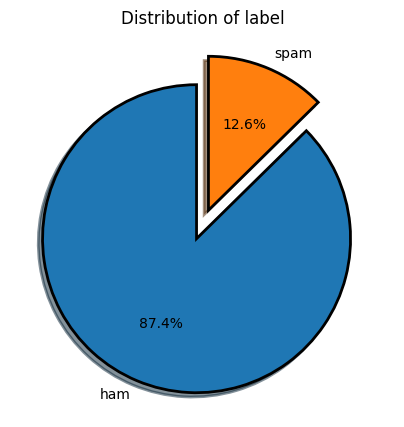

In [ ]:
import matplotlib.pyplot as plt
# Visualization of Categorical data (label)
fig = plt.figure(figsize=(5,5))
wp = {'linewidth':2, 'edgecolor':"black"}
tags = data['label'].value_counts()
explode = (0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of label')

We observed that label distributed in 2 levels, ham: 87.4% , spam: 12.6% which indicated our labels are imbalanced so we need to deal with using resampling.

In [ ]:
#check for the length of sms messages
data['length']= data['sms'].apply(lambda x: len(x.split(' ')))

<ipython-input-13-7ad3989b8429>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length']= data['sms'].apply(lambda x: len(x.split(' ')))


In [ ]:
#print avg. length of label for sms messages
print("Legitimate(ham) messages lnegth is:", round(data[data['label']=='ham']['length'].mean()))
print("Spam messages lnegth is:", round(data[data['label']=='spam']['length'].mean()))

Legitimate(ham) messages lnegth is: 14
Spam messages lnegth is: 24


**Plot the distribution based on sms length for each label**

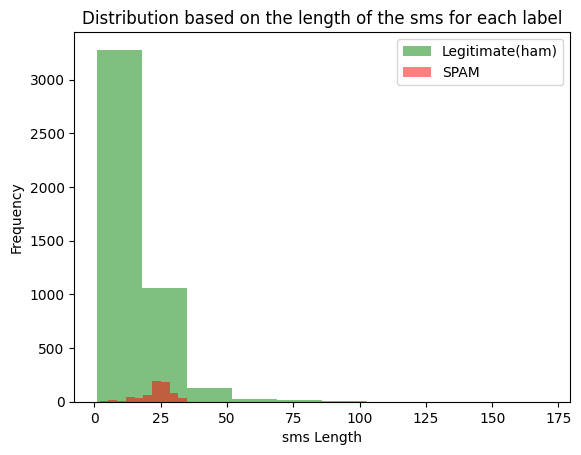

In [ ]:
# plot the distribution based on the length of the sms for each label
plt.hist(data[data['label']=='ham']['length'], bins=10, alpha=0.5, label='Legitimate(ham)', color='green')
plt.hist(data[data['label']=='spam']['length'], bins=10, alpha=0.5, label='SPAM', color='red')

# Add labels and legend
plt.xlabel('sms Length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Distribution based on the length of the sms for each label')

# Show the plot
plt.show()

In [ ]:
data.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


**FEATURE ENGINEERING & SELECTION**

In [ ]:
#mapping the values 'ham' to 0 and 'spam' to 1.(Convert categorical into numerical values)
data['mapped_label']= data['label'].map({'ham':0, 'spam':1})

<ipython-input-17-9ffd80d610c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mapped_label']= data['label'].map({'ham':0, 'spam':1})


In [ ]:
# check the intensity encoded or not
data = data[['sms', 'label', 'mapped_label']]
data

,sms,label,mapped_label
0,"Go until jurong point, crazy.. Available only ...",ham,0
1,Ok lar... Joking wif u oni...,ham,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,1
3,U dun say so early hor... U c already then say...,ham,0
4,"Nah I don't think he goes to usf, he lives aro...",ham,0
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam,1
5568,Will Ì_ b going to esplanade fr home?,ham,0
5569,"Pity, * was in mood for that. So...any other s...",ham,0
5570,The guy did some bitching but I acted like i'd...,ham,0


In [ ]:
#feature selection
X = data['sms']
y = data['mapped_label']

**DEALING WITH IMBALANCED DATASET USING UNDERSAMPLING**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

#Define the Undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

#Reshape X to a 1D array (necessary for undersampling)
X_reshaped = X.values.reshape(-1, 1)

#fit the Undersample in X & y
X_resampled, y_resampled = undersampler.fit_resample(X_reshaped, y)

# Convert X back to a Series
X_resampled = pd.Series(X_resampled.flatten())

Text(0.5, 1.0, 'After resampling: Distribution of Label')

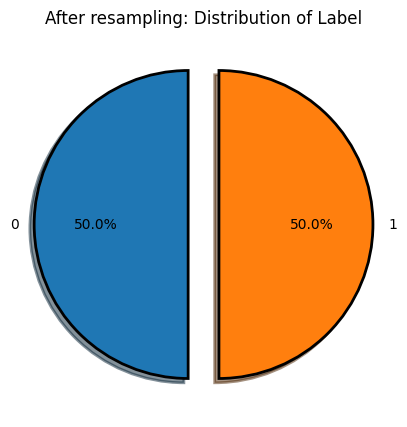

In [ ]:
# Visualization of resampled Intensity levels
fig = plt.figure(figsize=(5,5))
wp = {'linewidth':2, 'edgecolor':"black"}
tags = y_resampled.value_counts()
explode = (0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('After resampling: Distribution of Label')

Now labels are equally distributed as 50.0% which means our label levels are balanced.

**TF-IDF VECTORIZATION**

In [ ]:
# Importing the feature extraction library
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

#Fit and transform on the undersampled data
X_tfidf = tfidf_vectorizer.fit_transform(X_resampled)

**TRAIN/TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [ ]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_resampled, test_size=0.2, random_state=42)

In [ ]:
#Print the shape of X, y train & test dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1044, 4383), (262, 4383), (1044,), (262,))

**MODEL DEVELOPMENT AND EVALUATION**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [ ]:
# Define classifiers and their parameter grids for hyperparameter tuning
classifiers = {
    'Naive Bayes': (MultinomialNB(), {}),
    'Logistic Regression': (LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1, 10, 100]}),
    'Support Vector Machine': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})
}

In [ ]:
# Initialize variables to store the best model and its accuracy
best_model = None
best_test_accuracy = 0.0

# Comparison matrix
comparison_matrix = {'Classifier': [], 'Train Accuracy': [], 'Test Accuracy': []}

# Train classifiers and perform hyperparameter tuning
for name, (classifier, param_grid) in classifiers.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_classifier = grid_search.best_estimator_

    # Evaluate on the test set
    y_train_pred = best_classifier.predict(X_train)
    y_test_pred = best_classifier.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    comparison_matrix['Classifier'].append(name)
    comparison_matrix['Train Accuracy'].append(train_accuracy)
    comparison_matrix['Test Accuracy'].append(test_accuracy)

    print(f"\n{name} Classifier (Best Model):")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Confusion Matrix (Test):\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"Classification Report (Test):\n{classification_report(y_test, y_test_pred)}\n")

    # Update the best model if the current model is better
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_model = best_classifier


# Display the comparison matrix
comparison_df = pd.DataFrame(comparison_matrix)
print("\nComparison Matrix:")
comparison_df


Training Naive Bayes...

Naive Bayes Classifier (Best Model):
Train Accuracy: 0.9847
Test Accuracy: 0.9580
Best Parameters: {}
Confusion Matrix (Test):
[[132   1]
 [ 10 119]]
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       133
           1       0.99      0.92      0.96       129

    accuracy                           0.96       262
   macro avg       0.96      0.96      0.96       262
weighted avg       0.96      0.96      0.96       262


Training Logistic Regression...

Logistic Regression Classifier (Best Model):
Train Accuracy: 0.9761
Test Accuracy: 0.9313
Best Parameters: {'C': 1}
Confusion Matrix (Test):
[[131   2]
 [ 16 113]]
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       133
           1       0.98      0.88      0.93       129

    accuracy                           0.93       262
   macro avg       0.9

,Classifier,Train Accuracy,Test Accuracy
0,Naive Bayes,0.984674,0.958015
1,Logistic Regression,0.976054,0.931298
2,Support Vector Machine,0.990421,0.942748


We can observe clearly from our model comparison matrix that, the model with the highest test accuracy is Naive Bayes with 95.80%, hence we condiser this is our best trained model.

**SAVING THE MODEL**

In [ ]:
# Save the best trained model
if best_model:
    best_model_name = type(best_model).__name__
    best_model_path = f'{best_model_name}_best_model.pkl'
    joblib.dump(best_model, best_model_path)
print(f"\nBest Model ({best_model_name}) saved successfully at: {best_model_path}")



Best Model (MultinomialNB) saved successfully at: MultinomialNB_best_model.pkl


**TEST & VALIDATE THE MODEL**

In [ ]:
loaded_model = joblib.load('MultinomialNB_best_model.pkl')
# New SMS messages
new_sms_messages = [
    "Hi there, how are you doing? Let's catch up soon!",
    "Congratulations! You've won a free cruise vacation. Claim your prize now!",
    "The meeting is scheduled for tomorrow at 2 PM. Please be on time.",
    "Limited-time offer: Double your Bitcoin investment with our exclusive program.",
    "Hey, can you pick up some groceries on your way home?",
     "🎉 You're the lucky winner of a $1000 gift card. Redeem it now!"
]

# Vectorize each new SMS message using the same TF-IDF vectorizer
new_sms_tfidf = tfidf_vectorizer.transform(new_sms_messages)

# Making predictions for each new SMS message using the loaded model
predictions = loaded_model.predict(new_sms_tfidf)

# Create a DataFrame to store messages and predictions
result_df = pd.DataFrame({
    'Message': new_sms_messages,
    'Prediction': predictions
})
# Map numerical predictions to labels
result_df['Prediction'] = result_df['Prediction'].map({1: 'Spam', 0: 'Legitimate.(ham)'})

# Display the DataFrame with classified messages
result_df


,Message,Prediction
0,"Hi there, how are you doing? Let's catch up soon!",Legitimate.(ham)
1,Congratulations! You've won a free cruise vaca...,Spam
2,The meeting is scheduled for tomorrow at 2 PM....,Legitimate.(ham)
3,Limited-time offer: Double your Bitcoin invest...,Spam
4,"Hey, can you pick up some groceries on your wa...",Legitimate.(ham)
5,🎉 You're the lucky winner of a $1000 gift card...,Spam


**CONCLUSION:** Naive Bayes trained model identify correctly spam or legitimate messages.